# Projeto Visualização de dados de Resíduos Reciclados no Brasil

Este projeto foi desenvolvido por [Gustavo Lins](https://github.com/gnlins/Projeto_reciclaveis) com a intenção de aprimorar seus conhecimentos em análise de dados. 

O Dataset utilizado  foi o da relação das pessoas jurídicas que entregaram o Relatório de Atividades Potencialmente Poluidoras (RAPP) referente ao formulário Produtos Reciclados.

Esse formulário esteve em vigência entre os anos 2006 e 2013 e recolhe informações sobre Produtos Reciclados – tais como:
- tratamento e destinação de resíduos industriais líquidos e sólidos; 
- disposição de resíduos especiais;
- destinação de resíduos de esgotos sanitários e de resíduos sólidos urbanos, inclusive aqueles provenientes de fossas; 
- tratamento e destinação de resíduos industriais líquidos e sólidos; 
- destinação de pilhas e baterias.

Dataset está disponível [aqui](http://www.dados.gov.br/dataset/produtos-reciclados/resource/72a96394-72f9-4d19-ac5a-ab28bbfab2e2?inner_span=True).

# 1. Importando bibliotecas e acessando o Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
url = 'http://dadosabertos.ibama.gov.br/dados/RAPP/produtosReciclados/relatorio.csv'
rel = pd.read_csv(url, sep=';')

# 2. Explorando e conhecendo os dados

In [7]:
rel.head(2)

,CNPJ,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo,Situação Cadastral
0,00.024.376/0001-36,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,2004,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,1,kilogramas,40.263.170/0008-50 - ESSENCIS SOLUÇÕES AMBIENT...,Ativa
1,00.024.376/0001-36,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,2010,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,72,Ton. por ano,50.856.251/0001-40 - SILCON AMBIENTAL LTDA.,Ativa


In [10]:
rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23161 entries, 0 to 23160
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   CNPJ                            23161 non-null  object
 1   Razão Social                    23161 non-null  object
 2   Estado                          23161 non-null  object
 3   Município                       23161 non-null  object
 4   Ano                             23161 non-null  int64 
 5   Tipo de Resíduo                 23161 non-null  object
 6   Método de Reciclagem            23161 non-null  object
 7   Quantidade                      23161 non-null  object
 8   Unidade de Medida               23161 non-null  object
 9   Empresa Destinadora do Resíduo  23161 non-null  object
 10  Situação Cadastral              23161 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.9+ MB


<h5>Acima podemos conferir que a única informação numérica é o ano. A coluna de 'Quantidade', que também é preenchida por números, está como texto (já temos algo que precisará de nossa atenção). Explorando os dados, percebi que o separador de milhar '.', não permitiu que o número fosse reconhecido. Então utilizei a seguinte função para criar uma coluna com valores numéricos das quantidades.<h5/>

In [16]:
def converter(x):
    l = x.split('.')
    if len(l)>1:
        for i, e in enumerate(l):
            a = l[i-1]+e
    else:
        a=l[0]
    return a
rel['Qtde_numero'] = list(map(lambda x: converter(x),rel['Quantidade']))
rel['Qtde_numero'] = list(map(lambda x: float(x), rel['Qtde_numero']))
rel.head(1)

,CNPJ,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo,Situação Cadastral,Qtde_numero
0,00.024.376/0001-36,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,2004,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,1,kilogramas,40.263.170/0008-50 - ESSENCIS SOLUÇÕES AMBIENT...,Ativa,1.0


In [18]:
rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23161 entries, 0 to 23160
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CNPJ                            23161 non-null  object 
 1   Razão Social                    23161 non-null  object 
 2   Estado                          23161 non-null  object 
 3   Município                       23161 non-null  object 
 4   Ano                             23161 non-null  int64  
 5   Tipo de Resíduo                 23161 non-null  object 
 6   Método de Reciclagem            23161 non-null  object 
 7   Quantidade                      23161 non-null  object 
 8   Unidade de Medida               23161 non-null  object 
 9   Empresa Destinadora do Resíduo  23161 non-null  object 
 10  Situação Cadastral              23161 non-null  object 
 11  Qtde_numero                     23161 non-null  float64
dtypes: float64(1), int64(1), object(

In [29]:
rel['Estado'].nunique()

24

In [59]:
rel[rel['Tipo de Resíduo']=='Óleo lubrificante usado']

,CNPJ,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo,Situação Cadastral,Qtde_numero
227,00.143.381/0001-68,MONTEVERDE AGRO-ENERGETICA S.A,MATO GROSSO DO SUL,PONTA PORA,2009,Óleo lubrificante usado,Outros,6.160,Litro,46.201.083/0009-35 - LWART LUBRIFICANTES LTDA,Ativa,6160.0
231,00.143.381/0001-68,MONTEVERDE AGRO-ENERGETICA S.A,MATO GROSSO DO SUL,PONTA PORA,2010,Óleo lubrificante usado,Outros,20.480,Litro,46.201.083/0009-35 - LWART LUBRIFICANTES LTDA,Ativa,20480.0
238,00.143.381/0001-68,MONTEVERDE AGRO-ENERGETICA S.A,MATO GROSSO DO SUL,PONTA PORA,2011,Óleo lubrificante usado,Outros,26.080,kilogramas,46.201.083/0009-35 - LWART LUBRIFICANTES LTDA,Ativa,26080.0
441,00.417.391/0001-44,AMBICONTROL SERVIÇOS E REPRESENTAÇÕES LTDA.,RIO DE JANEIRO,DUQUE DE CAXIAS,2003,Óleo lubrificante usado,Outros,50,Litro,46.201.083/0011-50 - LWART LUBRIFICANTES LTDA,Ativa,50.0
442,00.417.391/0001-44,AMBICONTROL SERVIÇOS E REPRESENTAÇÕES LTDA.,RIO DE JANEIRO,DUQUE DE CAXIAS,2006,Óleo lubrificante usado,Outros,55,Litro,28.166.072/0001-22 - RESIPETROL LTDA.,Ativa,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22966,90.341.447/0001-17,RODOVALE - INDUSTRIA E COMERCIO DE EQUIPAMENTO...,RIO GRANDE DO SUL,LAJEADO,2010,Óleo lubrificante usado,Outros,4,Metro Cúbico,92.678.432/0001-74 - INDUSTRIA PETROQUIMICA DO...,Ativa,4.0
23045,93.533.578/0001-94,RENOVA LAVANDERIA E TOALHEIRO LTDA.,RIO GRANDE DO SUL,CACHOEIRINHA,2011,Óleo lubrificante usado,Outros,3.200,Litro,46.201.083/0011-50 - LWART LUBRIFICANTES LTDA,Ativa,3200.0
23050,93.533.578/0007-80,RENOVA LAVANDERIA & TOALHEIRO LTDA.,BAHIA,CAMACARI,2003,Óleo lubrificante usado,Outros,1.750,Litro,05.013.976/0001-12 - LWART LUBRIFICANTES DO NO...,Ativa,1750.0
23052,93.533.578/0007-80,RENOVA LAVANDERIA & TOALHEIRO LTDA.,BAHIA,CAMACARI,2011,Óleo lubrificante usado,Outros,450,Litro,05.013.976/0001-12 - LWART LUBRIFICANTES DO NO...,Ativa,450.0


In [27]:
rel['Unidade de Medida'].nunique()

47

In [32]:
rel['Método de Reciclagem'].nunique()

14

In [34]:
rel['Situação Cadastral'].nunique()

5

# 3. Limpando os dados
Aqui vamos retirar as informações que não são do nosso interesse.

In [15]:
rel.drop(['CNPJ','Quantidade', 'Razão Social', 'Empresa Destinadora do Resíduo', 'Situação Cadastral'], axis=1)

,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Unidade de Medida,Qtde_numero
0,SAO PAULO,GUARULHOS,2004,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,kilogramas,1.0
1,SAO PAULO,GUARULHOS,2010,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,Ton. por ano,72.0
2,SAO PAULO,GUARULHOS,2012,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,Ton. por ano,111.0
3,SANTA CATARINA,SAO BENTO DO SUL,2009,Embalagens metálicas (latas vazias não contami...,Outros,Unidade,26876.0
4,SANTA CATARINA,SAO BENTO DO SUL,2009,Embalagens metálicas (latas vazias não contami...,Outros,Unidade,2257.0
...,...,...,...,...,...,...,...
23156,MINAS GERAIS,UBERABA,2012,"Resíduo de madeira (restos de embalagens, pall...",Queima caldeira,Tonelada,572.0
23157,MINAS GERAIS,UBERABA,2012,Resíduo de papel e papelão,Outros,Tonelada,62.0
23158,MINAS GERAIS,UBERABA,2012,Resíduo de restaurante(restos de alimentos),Outros,Tonelada,52.0
23159,MINAS GERAIS,UBERABA,2012,Resíduo plástico(filmes e pequenas embalagens),Outros,Tonelada,15.0


In [14]:
rel.head(1)

,CNPJ,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo,Situação Cadastral,Qtde_numero
0,00.024.376/0001-36,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,2004,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,1,kilogramas,40.263.170/0008-50 - ESSENCIS SOLUÇÕES AMBIENT...,Ativa,1.0


[Text(0, 0, 'MATO GROSSO DO SUL'),
 Text(0, 0, 'RIO DE JANEIRO'),
 Text(0, 0, 'ESPIRITO SANTO'),
 Text(0, 0, 'SANTA CATARINA'),
 Text(0, 0, 'SAO PAULO'),
 Text(0, 0, 'GOIAS'),
 Text(0, 0, 'MATO GROSSO'),
 Text(0, 0, 'MINAS GERAIS'),
 Text(0, 0, 'RIO GRANDE DO SUL'),
 Text(0, 0, 'TOCANTINS'),
 Text(0, 0, 'PARA'),
 Text(0, 0, 'AMAZONAS'),
 Text(0, 0, 'PARANA'),
 Text(0, 0, 'BAHIA'),
 Text(0, 0, 'PARAIBA'),
 Text(0, 0, 'CEARA'),
 Text(0, 0, 'PERNAMBUCO'),
 Text(0, 0, 'SERGIPE'),
 Text(0, 0, 'RONDONIA'),
 Text(0, 0, 'ALAGOAS')]

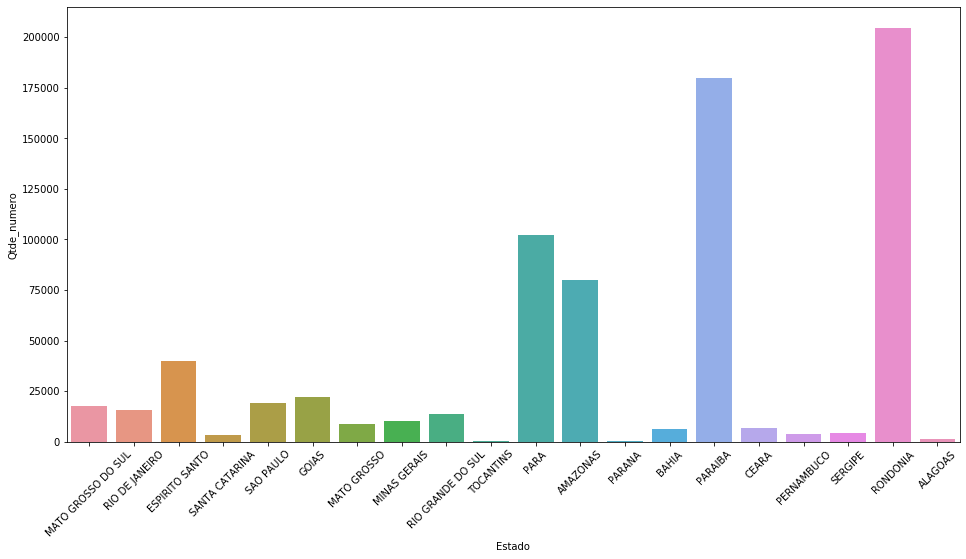

In [56]:
plt.figure(figsize=(16,8))
chart=sns.barplot(x=rel[rel['Tipo de Resíduo']=='Óleo lubrificante usado']['Estado'], y=rel[rel['Tipo de Resíduo']=='Óleo lubrificante usado']['Qtde_numero'], ci=None)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)